In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import clone
import joblib  as jb
import json

In [2]:
df=pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df2=df.drop(['society','availability','area_type'],axis=1)

In [6]:
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [7]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
df3=df2.dropna().reset_index(drop=True)

In [9]:
df3

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
12705,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
12706,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
12707,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
12708,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3.groupby('size')['size'].count()

size
1 BHK          530
1 Bedroom      105
1 RK            13
10 Bedroom       3
11 BHK           1
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
2 BHK         5152
2 Bedroom      328
27 BHK           1
3 BHK         4128
3 Bedroom      527
4 BHK          489
4 Bedroom      749
43 Bedroom       1
5 BHK           36
5 Bedroom      263
6 BHK           23
6 Bedroom      169
7 BHK           16
7 Bedroom       69
8 BHK            3
8 Bedroom       65
9 BHK            5
9 Bedroom       29
Name: size, dtype: int64

In [12]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df3

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
12705,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
12706,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
12707,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
12708,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [14]:
df4=df3.drop(['size'],axis=1)

In [15]:
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
12705,Green Glen Layout,1715,3.0,3.0,112.00,3
12706,Whitefield,3453,4.0,0.0,231.00,5
12707,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
12708,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [16]:
#df4['price_Per_sqfoot']=df4['price']/df4['total_sqft']
# may be price or total_sqf contains str

In [17]:
type(df4['price'])

pandas.core.series.Series

In [18]:
df4['price'].describe()

count    12710.000000
mean       106.060778
std        131.766089
min          8.000000
25%         49.030000
50%         70.000000
75%        115.000000
max       2912.000000
Name: price, dtype: float64

In [19]:
df4['total_sqft'].describe()

count     12710
unique     1976
top        1200
freq        788
Name: total_sqft, dtype: object

In [20]:
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
df4.groupby('total_sqft')['total_sqft'].count().sort_values(ascending=False)

total_sqft
1200    788
1100    218
1500    198
2400    177
600     172
       ... 
2342      1
2363      1
2365      1
2370      1
2375      1
Name: total_sqft, Length: 1976, dtype: int64

In [22]:
def ppr(a,b):
    for c in a[b] :
        try:
            c=int(c)   
        except Exception :
            print(c)
    

In [23]:
ppr(df4,'total_sqft')

2100 - 2850
1330.74
3067 - 8156
1042 - 1105
1563.05
1145 - 1340
1015 - 1540
2023.71
1113.27
34.46Sq. Meter
1752.12
1195 - 1440
1120 - 1145
3090 - 5002
1160 - 1195
1000Sq. Meter
1115 - 1130
520 - 645
1000 - 1285
650 - 665
633 - 666
2112.95
5.31Acres
30Acres
1445 - 1455
884 - 1116
850 - 1093
1558.67
3467.86
716Sq. Meter
547.34 - 827.31
804.1
580 - 650
3425 - 3435
1269.72
1804 - 2273
3630 - 3800
4000 - 5249
1500Sq. Meter
142.61Sq. Meter
1574Sq. Yards
2479.13
2172.65
581.91
1250 - 1305
670 - 980
1005.03 - 1252.49
3630 - 3800
1004 - 1204
1752.12
645 - 936
2710 - 3360
1452.55
2830 - 2882
596 - 804
1776.42
1255 - 1863
1300 - 1405
117Sq. Yards
934 - 1437
980 - 1030
1452.19
1419.59
461.82
2249.81 - 4112.19
1070 - 1315
3040Sq. Meter
500Sq. Yards
1020.07
2806 - 3019
613 - 648
1451.5
704 - 730
1584.01
1205.47
1689.28
1819.18
1210 - 1477
3369 - 3464
1125 - 1500
167Sq. Meter
1076 - 1199
381 - 535
1627.86
524 - 894
1369.1
1053.4
540 - 670
2725 - 3250
1732.46
910.2
2006.8
888 - 1290
660 - 700
385 - 44

In [24]:
def pprc(a,b):
    i=0
    for c in a[b] :
        try:
            c=int(c)   
        except Exception :
            i+=1
    print(i)

In [25]:
pprc(df4,'total_sqft')

272


In [26]:
def tsq(a,b):
    tsq=[]
    d=pd.DataFrame()
    for c in a[b] :
        try:
            c=int(c)
            tsq.append(c)
        except Exception :
            try:
                f=lambda x:(float(x.split('-')[0])+float(x.split('-')[0]))/2
                tsq.append(f(c))
            except Exception :
                tsq.append(None)
    d['total_sqft_']=tsq            
    return d 

In [27]:
d=tsq(df4,'total_sqft')

In [28]:
df5=pd.concat([df4,d],axis=1)

In [29]:
df5

,location,total_sqft,bath,balcony,price,bhk,total_sqft_
0,Electronic City Phase II,1056,2.0,1.0,39.07,2,1056.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4,2600.0
2,Uttarahalli,1440,2.0,3.0,62.00,3,1440.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3,1521.0
4,Kothanur,1200,2.0,1.0,51.00,2,1200.0
...,...,...,...,...,...,...,...
12705,Green Glen Layout,1715,3.0,3.0,112.00,3,1715.0
12706,Whitefield,3453,4.0,0.0,231.00,5,3453.0
12707,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2,1141.0
12708,Padmanabhanagar,4689,4.0,1.0,488.00,4,4689.0


In [30]:
df5['total_sqft']=df5['total_sqft_']

In [31]:
df6=df5.drop(['total_sqft_'],axis=1)
df6

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
12705,Green Glen Layout,1715.0,3.0,3.0,112.00,3
12706,Whitefield,3453.0,4.0,0.0,231.00,5
12707,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
12708,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [32]:
df6.isnull().sum()

location       0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [33]:
df7=df6.dropna().reset_index(drop=True)
df7

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
12663,Green Glen Layout,1715.0,3.0,3.0,112.00,3
12664,Whitefield,3453.0,4.0,0.0,231.00,5
12665,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
12666,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [34]:
df7.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [35]:
df7['price_Per_sqfoot']=df7['price']*100000/df7['total_sqft']

In [36]:
df7

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
12663,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
12664,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
12665,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
12666,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [37]:
df7['price_Per_sqfoot'].describe()

count    1.266800e+04
mean     6.882439e+03
std      2.263349e+04
min      2.678298e+02
25%      4.250000e+03
50%      5.385281e+03
75%      7.151855e+03
max      2.300000e+06
Name: price_Per_sqfoot, dtype: float64

In [38]:
df7.groupby('location')['location'].unique().count()

np.int64(1259)

In [39]:
df7['location']=df7['location'].apply(lambda x: x.strip())

In [40]:
df7.groupby('location')['location'].unique().count()

np.int64(1248)

In [41]:
df7

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
12663,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
12664,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
12665,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
12666,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [42]:
df7.groupby('location')['location'].count().sort_values(ascending=False)

location
Whitefield                        514
Sarjapur  Road                    372
Electronic City                   302
Kanakpura Road                    259
Thanisandra                       233
                                 ... 
2nd phase jp nagar, jp nagar        1
3rd Block HBR Layout                1
KPC Layout                          1
asha township, off hennur road      1
Vittal Mallya Road                  1
Name: location, Length: 1248, dtype: int64

In [43]:
lcc=df7.groupby('location')['location'].count() 

In [44]:
lcc

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1248, dtype: int64

In [45]:
lcca=lcc[lcc<=10]

In [46]:
lcca

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
1A Block Koramangala                               1
                                                  ..
south                                              2
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
whitefiled                                         1
Name: location, Length: 1013, dtype: int64

In [47]:
df7['location']=df7['location'].apply(lambda x: 'other' if x in lcca else x )

In [48]:
df7.groupby('location')['location'].count().sort_values(ascending=False)

location
other                   2741
Whitefield               514
Sarjapur  Road           372
Electronic City          302
Kanakpura Road           259
                        ... 
Prithvi Layout            11
Nagasandra                11
Narayanapura              11
Tindlu                    11
Vishveshwarya Layout      11
Name: location, Length: 236, dtype: int64

In [49]:
df7.groupby('location')['location'].unique().count()

np.int64(236)

In [50]:
df8=df7[~(df7['total_sqft']/df7['bhk']<300)]

In [51]:
i=0
for k, j in df8.groupby('price_Per_sqfoot'):
     print(k)
     print(end="\n\n")
     print(j)
     i+=1
     if i==10:
         break

267.82981328435875


     location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
1786    other     52272.0   2.0      1.0  140.0    3        267.829813
371.42857142857144


      location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
640  Yelahanka     35000.0   3.0      3.0  130.0    3        371.428571
416.6666666666667


     location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
5109    other     42000.0   8.0      3.0  175.0    9        416.666667
500.0


      location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
11162    Begur      2400.0   3.0      2.0   12.0    3             500.0
573.921028466483


       location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
6859  Yelahanka     26136.0   1.0      0.0  150.0    1        573.921028
729.8604141957851


     location  total_sqft  bath  balcony  price  bhk  price_Per_sqfoot
769     other     10961.0   4.0      1.0   80.0    4        729.860414
8755    other     10961.0   4.0

In [52]:
i=0
for k, j in df8.groupby('price_Per_sqfoot')['price_Per_sqfoot']:

     print(k)
     print(end="\n\n")
     print(j)
     i+=1
     if i==10:
         break

267.82981328435875


1786    267.829813
Name: price_Per_sqfoot, dtype: float64
371.42857142857144


640    371.428571
Name: price_Per_sqfoot, dtype: float64
416.6666666666667


5109    416.666667
Name: price_Per_sqfoot, dtype: float64
500.0


11162    500.0
Name: price_Per_sqfoot, dtype: float64
573.921028466483


6859    573.921028
Name: price_Per_sqfoot, dtype: float64
729.8604141957851


769     729.860414
8755    729.860414
Name: price_Per_sqfoot, dtype: float64
912.1518212427303


11863    912.151821
Name: price_Per_sqfoot, dtype: float64
1166.6666666666667


7939    1166.666667
Name: price_Per_sqfoot, dtype: float64
1250.0


2289    1250.0
5181    1250.0
Name: price_Per_sqfoot, dtype: float64
1300.0


3762    1300.0
Name: price_Per_sqfoot, dtype: float64


In [53]:
def tt(a,b,c):
    out=pd.DataFrame()
    for k, j in a.groupby(c):
        mean=np.mean(j[b])
        std=np.std(j[b])
        rf=j[(j[b]<(mean+std)) & (j[b]>=(mean-std))]
        out=pd.concat([out,rf],ignore_index=True)
    return out   

In [54]:
df9=tt(df8,'price_Per_sqfoot','location')

In [55]:
df9

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
9868,other,1256.0,2.0,1.0,65.00,2,5175.159236
9869,other,1353.0,2.0,2.0,110.00,2,8130.081301
9870,other,812.0,1.0,0.0,26.00,1,3201.970443
9871,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [56]:
df9=df9.reset_index(drop=True)

In [57]:
df9

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
9868,other,1256.0,2.0,1.0,65.00,2,5175.159236
9869,other,1353.0,2.0,2.0,110.00,2,8130.081301
9870,other,812.0,1.0,0.0,26.00,1,3201.970443
9871,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [58]:
df10=df9[((df9['bath'])<(df9['bhk']+2))]

In [59]:
df10=df10.reset_index(drop=True)

In [60]:
df10['location'] = df10['location'].apply(lambda x: x.lower())

In [61]:
df10

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,1st block jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st block jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st block jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st block jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st block jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
9785,other,1256.0,2.0,1.0,65.00,2,5175.159236
9786,other,1353.0,2.0,2.0,110.00,2,8130.081301
9787,other,812.0,1.0,0.0,26.00,1,3201.970443
9788,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [62]:
def plota(a,b,c):
    bhk2=pd.DataFrame()
    bhk3=pd.DataFrame()
    bhk2=a['bhk'][(a['bhk']==2) & (a[b]==c)]
    bhk3=a['bhk'][(a['bhk']==3) & (a[b]==c)]
    return bhk2, bhk3

In [63]:
bhk2,bhk3=plota(df10,'location','kothanur')

In [64]:
bhk2

4376    2
4378    2
4384    2
4387    2
4392    2
4394    2
4396    2
4397    2
4399    2
4404    2
4406    2
4407    2
4408    2
4409    2
4410    2
4411    2
4412    2
4413    2
4416    2
4418    2
4421    2
4422    2
4424    2
4425    2
Name: bhk, dtype: int64

In [65]:
def plot(a,b,c):
    bhk2=pd.DataFrame()
    bhk3=pd.DataFrame()
    bhk2=a[(a['bhk']==2) & (a[b]==c)]
    bhk3=a[(a['bhk']==3) & (a[b]==c)]
    plt.scatter(bhk2['total_sqft'],bhk2['price'],c='red',marker="*",alpha=0.95,s=bhk2['price_Per_sqfoot']/150)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],c='yellow',alpha=0.4,s=bhk3['price_Per_sqfoot']/150)
    plt.xlabel("total_sqft")
    plt.ylabel("price")
    plt.show()

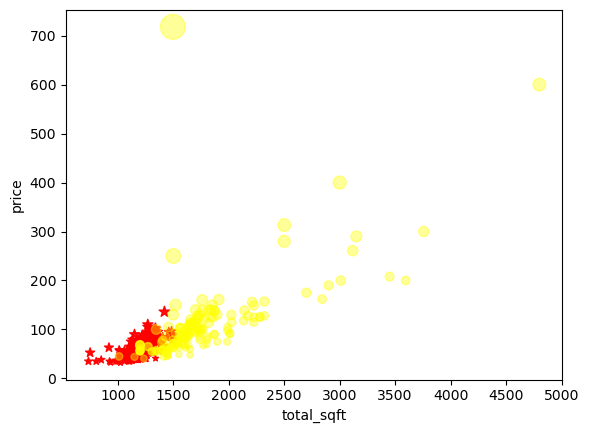

In [66]:
plot(df7,'location','Whitefield')

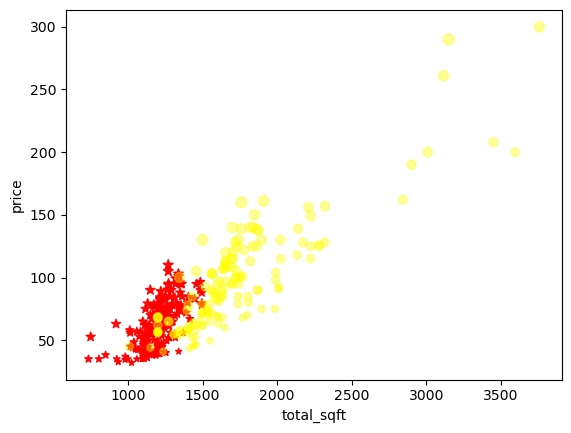

In [67]:
plot(df10,'location','whitefield')

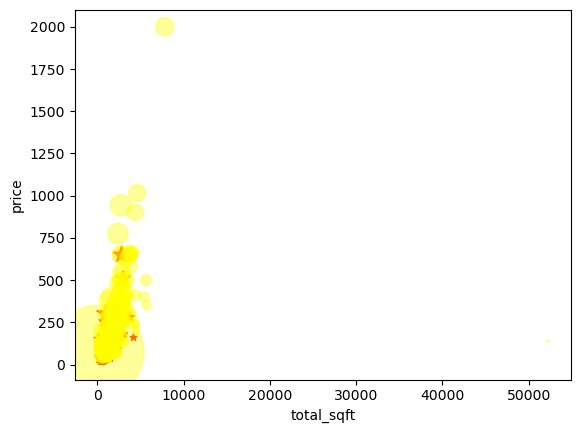

In [68]:
plot(df7,'location','other')

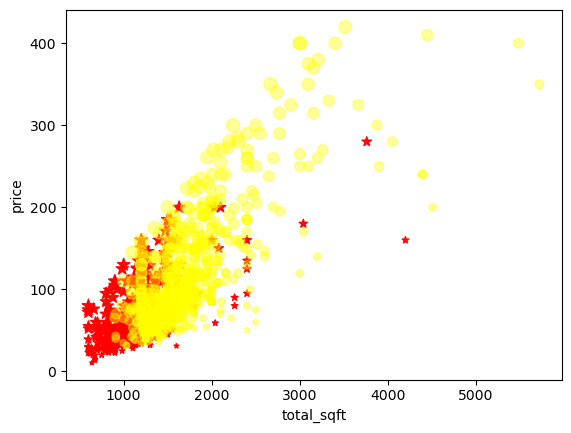

In [69]:
plot(df10,'location','other')

<Axes: xlabel='total_sqft', ylabel='price'>

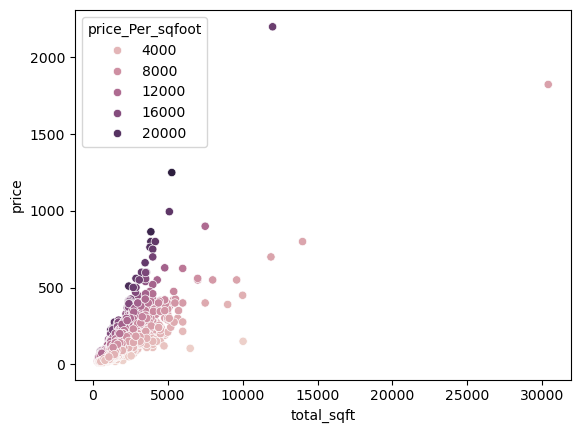

In [70]:
sns.scatterplot(data=df10,x='total_sqft',y='price',hue='price_Per_sqfoot')

<Axes: xlabel='total_sqft', ylabel='price'>

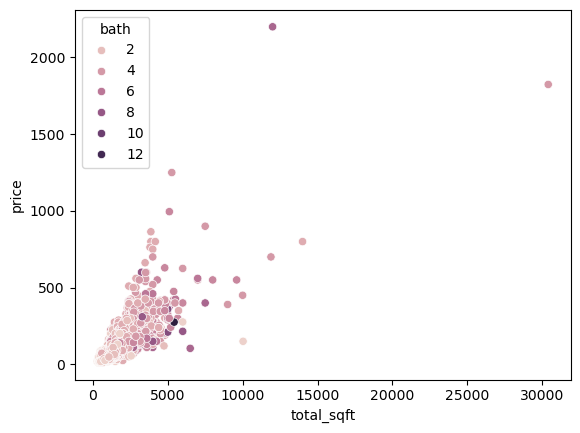

In [71]:
sns.scatterplot(data=df10,x='total_sqft',y='price',hue='bath')

In [72]:
def plot2(a,b,c):
    bt=a[(a[b]==c)]
    sns.scatterplot(data=bt,x='total_sqft',y='price',hue='bath')
    plt.show()

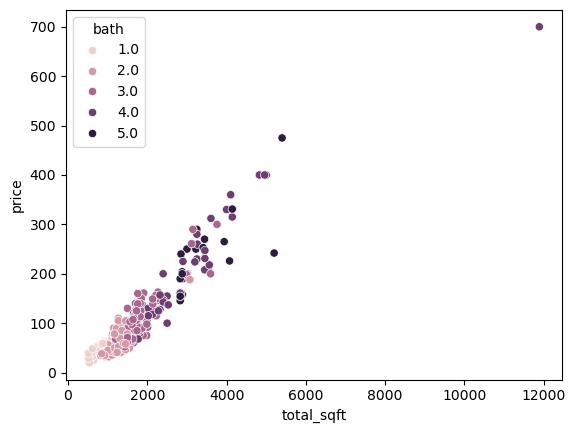

In [73]:
plot2(df10,'location','whitefield')

In [74]:
df10.bhk.describe()

count    9790.000000
mean        2.522472
std         0.832391
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        13.000000
Name: bhk, dtype: float64

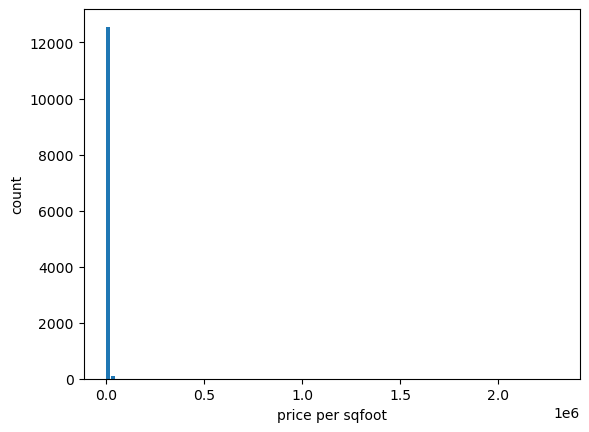

In [75]:
plt.hist(df7['price_Per_sqfoot'],rwidth=0.9,bins=100)
plt.xlabel("price per sqfoot")
plt.ylabel("count")
plt.show()

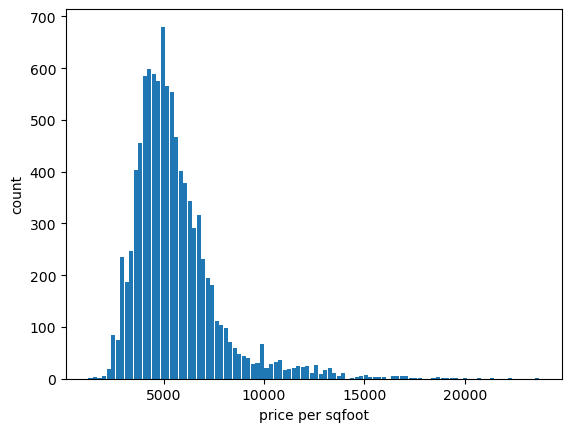

In [76]:
plt.hist(df10['price_Per_sqfoot'],rwidth=0.9,bins=100)
plt.xlabel("price per sqfoot")
plt.ylabel("count")
plt.show()

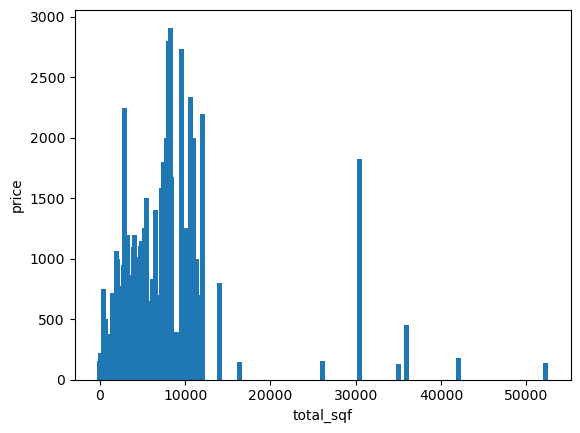

In [77]:
plt.bar(df7['total_sqft'],df7['price'],width=600)
plt.xlabel("total_sqf")
plt.ylabel("price")
plt.show()

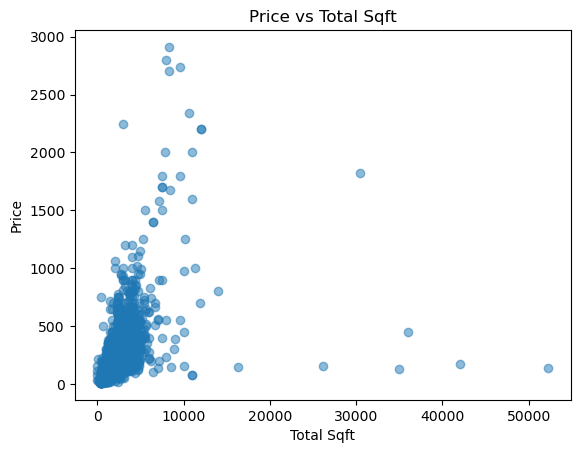

In [78]:
plt.scatter(df7['total_sqft'], df7['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Price vs Total Sqft")
plt.show()

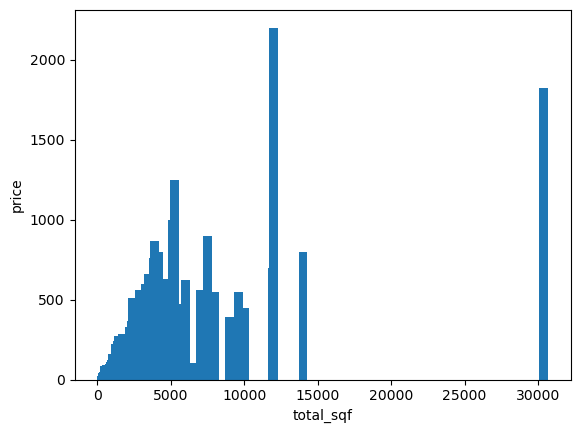

In [79]:
plt.bar(df10['total_sqft'],df10['price'],width=600)
plt.xlabel("total_sqf")
plt.ylabel("price")
plt.show()

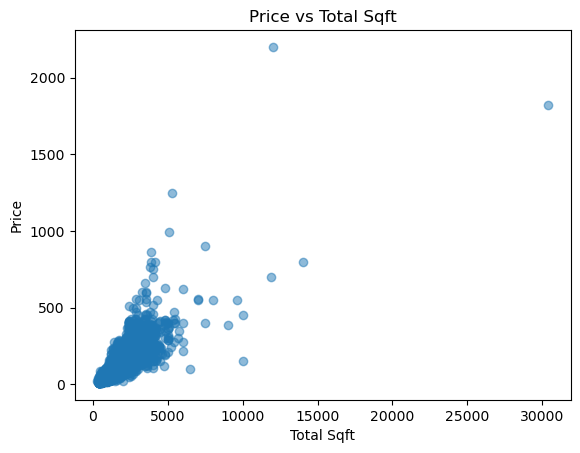

In [80]:
plt.scatter(df10['total_sqft'], df10['price'], alpha=0.5)
plt.xlabel("Total Sqft")
plt.ylabel("Price")
plt.title("Price vs Total Sqft")
plt.show()

In [81]:
dummes=pd.get_dummies(df10.location).astype(int)

In [82]:
dummes

,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
d1=dummes.drop(['other'],axis=1)

In [84]:
d1

,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df11=pd.concat([df10,dummes],axis=1)

In [86]:
df11

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,1st block jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st block jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st block jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st block jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st block jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,other,1256.0,2.0,1.0,65.00,2,5175.159236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,other,1353.0,2.0,2.0,110.00,2,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,other,812.0,1.0,0.0,26.00,1,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,other,1440.0,2.0,2.0,63.93,3,4439.583333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df11=df11.drop(['location','price_Per_sqfoot'],axis=1)

In [88]:
df11

,total_sqft,bath,balcony,price,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,1.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,1256.0,2.0,1.0,65.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,1353.0,2.0,2.0,110.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,812.0,1.0,0.0,26.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,1440.0,2.0,2.0,63.93,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
x=df11.drop(['price'],axis=1)

In [90]:
x

,total_sqft,bath,balcony,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,1256.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,1440.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
y=df11.price

In [92]:
y

0       428.00
1       194.00
2       235.00
3       130.00
4       148.00
         ...  
9785     65.00
9786    110.00
9787     26.00
9788     63.93
9789     48.00
Name: price, Length: 9790, dtype: float64

In [93]:
param_grids = {
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'max_iter': [1000, 5000, 10000]
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    'linear': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False]
        }
    },
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [30, 10, 20],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
}


base_estimators = {
    'lasso': Lasso(),
    'ridge': Ridge(),
    'linear': LinearRegression(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'knn': KNeighborsRegressor()
}


bagging_common_params = {
    'n_estimators': [30, 15, 7],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}


for name, estimator in base_estimators.items():
    param_grids[f'bagging_{name}'] = {
        'model': BaggingRegressor(estimator=clone(estimator), random_state=42),
        'params': bagging_common_params
    }


In [94]:
cv=ShuffleSplit(n_splits=6)

In [96]:
import warnings

In [97]:
#takes more and more................................................Time
best_models={}
best_score={}
warnings.filterwarnings('ignore')
for name, config in param_grids.items():
    warnings.filterwarnings('ignore')
    grid = GridSearchCV(config['model'], config['params'], cv=cv)
    warnings.filterwarnings('ignore')
    grid.fit(x,y)
    warnings.filterwarnings('ignore')
    best_models[name] = grid.best_estimator_
    best_score[name] = grid.best_score_

KeyboardInterrupt: 

In [100]:
best_models

{'lasso': Lasso(alpha=0.01),
 'ridge': Ridge(alpha=0.1),
 'linear': LinearRegression(fit_intercept=False),
 'knn': KNeighborsRegressor(n_neighbors=3, p=1),
 'random_forest': RandomForestRegressor(min_samples_leaf=4, n_estimators=20),
 'decision_tree': DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10)}

In [101]:
best_score

{'lasso': np.float64(0.8139067850522803),
 'ridge': np.float64(0.8322762279248598),
 'linear': np.float64(0.7826678481729289),
 'knn': np.float64(0.6882926856855299),
 'random_forest': np.float64(0.7559897327760169),
 'decision_tree': np.float64(0.711016128858699)}

In [102]:
mod1=Lasso(max_iter=10000,alpha=0.01)

In [103]:
m1=cross_val_score(mod1,x,y,cv=cv)

In [104]:
m1

array([0.84082429, 0.78058384, 0.75666498, 0.74409571, 0.81980746,
       0.79868834])

In [105]:
mod2=Ridge(alpha=0.000001)

In [106]:
m2=cross_val_score(mod2,x,y,cv=cv)

In [107]:
m2

array([0.77274634, 0.79818804, 0.82355754, 0.80488891, 0.8209139 ,
       0.82549601])

In [108]:
mod3=LinearRegression()

In [109]:
m3=cross_val_score(mod3,x,y,cv=cv)

In [110]:
m3

array([0.79676419, 0.71433283, 0.73440345, 0.76461006, 0.72126822,
       0.82980115])

In [111]:
mod4=KNeighborsRegressor(n_neighbors=9,p=1)

In [112]:
m4=cross_val_score(mod4,x,y,cv=cv)

In [113]:
m4

array([0.71617398, 0.67077653, 0.62123342, 0.73648887, 0.68220448,
       0.69124954])

In [114]:
mod5=DecisionTreeRegressor()

In [115]:
m5=cross_val_score(mod5,x,y,cv=cv)

In [116]:
m5

array([0.53519426, 0.76135414, 0.68571639, 0.54682508, 0.772154  ,
       0.74306074])

In [119]:
mod6=RandomForestRegressor(n_estimators=10)

In [120]:
m6=cross_val_score(mod6,x,y,cv=cv)

In [121]:
m6

array([0.77024494, 0.77716549, 0.78861041, 0.83422656, 0.56595514,
       0.8489791 ])

In [122]:
mod7=BaggingRegressor(estimator=mod1,n_estimators=10)
m7=cross_val_score(mod7,x,y,cv=cv)
m7

array([0.7010179 , 0.86288222, 0.78495255, 0.82772588, 0.7963434 ,
       0.81969645])

In [123]:
mod71=BaggingRegressor(estimator=mod2,n_estimators=10)
m71=cross_val_score(mod2,x,y,cv=cv)
m71

array([0.82732351, 0.80197464, 0.76781972, 0.77723649, 0.70724975,
       0.79913548])

In [124]:
mod8=BaggingRegressor(estimator=mod3,n_estimators=10)
m8=cross_val_score(mod8,x,y,cv=cv)
m8

array([0.74515371, 0.8248142 , 0.78823453, 0.67530506, 0.87687336,
       0.79345579])

In [125]:
mod9=BaggingRegressor(estimator=mod4,n_estimators=10)
m9=cross_val_score(mod9,x,y,cv=cv)
m9

array([0.73009896, 0.62717683, 0.6813939 , 0.74386726, 0.48786764,
       0.53269636])

In [126]:
mod10=BaggingRegressor(estimator=mod5,n_estimators=10)
m10=cross_val_score(mod10,x,y,cv=cv)
m10

array([0.79090126, 0.77282283, 0.598586  , 0.73494835, 0.78148444,
       0.83634945])

In [127]:
#takes more and ..........................................more Time
mod11=BaggingRegressor(estimator=mod6,n_estimators=10)
m11=cross_val_score(mod11,x,y,cv=cv)
m11

array([0.76988417, 0.793645  , 0.83186298, 0.77028012, 0.82761093,
       0.81620674])

In [134]:
modf=Ridge(alpha=0.1)
modf.fit(x,y)
modf.score(x,y)

0.811394539716902

In [135]:
df10

,location,total_sqft,bath,balcony,price,bhk,price_Per_sqfoot
0,1st block jayanagar,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st block jayanagar,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st block jayanagar,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st block jayanagar,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st block jayanagar,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
9785,other,1256.0,2.0,1.0,65.00,2,5175.159236
9786,other,1353.0,2.0,2.0,110.00,2,8130.081301
9787,other,812.0,1.0,0.0,26.00,1,3201.970443
9788,other,1440.0,2.0,2.0,63.93,3,4439.583333


In [136]:
x

,total_sqft,bath,balcony,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,1256.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9786,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9787,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9788,1440.0,2.0,2.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
def prid(loc,tosq,bhkk,bat,bal):
    xindex=np.where(x.columns==loc.lower())[0][0] 
    xi=np.zeros(len(x.columns))
    xi[0]=tosq
    xi[1]=bat	
    xi[2]=bal
    xi[3]=bhkk
    if xindex>=4:
        xi[xindex]=1
    xi=xi.reshape(1,-1)    
    return modf.predict(xi)    

In [138]:
#def prid(loc,tosq,bhkk,bat,bal):
    #xindex=np.where(x.columns.lower()==loc.lower())[0][0]  
    #xi=np.zeros(len(x.columns))
    # xi[0]=tosq
    # xi[1]=bat	
    # xi[2]=bal
    # xi[3]=bhkk
    #if(xindex>=4):
        #xi[xindex]=1
   #xi=xi.reshape(1,-1)    
   #return modf.predict(xi)          

In [139]:
py=prid('1st Block Jayanagar',2850.0,4,4,1)
py

array([336.03945331])

In [140]:
jb.dump(prid,'real_estate.pkl')

['real_estate.pkl']

In [141]:
modle=jb.load('real_estate.pkl')

In [142]:
ppy=modle('2nd Stage Nagarbhavi',3850,4,4,1)
ppy

array([393.8725929])

In [143]:
columns = {
    'data_columns': [col.lower() for col in x.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [144]:
jb.dump(modf,'real_estate.pkl')

['real_estate.pkl']

In [155]:
def predict_real_estate():
    import json
    import numpy as np
    import joblib
    # Load JSON and model
    data = json.load(open("columns.json"))
    columns = data["data_columns"]
    model = joblib.load("real_estate.pkl")

    # Prepare zero-input vector
    xi = np.zeros(len(columns))

    # Inputs from user
    location = input("Enter Location: ").strip()
    tos = float(input("Enter Total Square Feet: "))
    bhk = float(input("Enter BHK: "))
    bathroom = float(input("Enter Number of Bathrooms: "))
    balcony = float(input("Enter Number of Balconies: "))

    # Assign numeric features
    xi[columns.index("total_sqft")] = tos
    xi[columns.index("bhk")] = bhk
    xi[columns.index("bath")] = bathroom
    xi[columns.index("balcony")] = balcony

    # One-hot encode location
    for i, col in enumerate(columns):
        if col.lower() == location.lower():
            xi[i] = 1
            break

    # Predict
    prediction = model.predict([xi])[0]
    print(f"\nPredicted Price: {prediction}")
    return prediction


In [156]:
predict_real_estate()

Enter Location:  others
Enter Total Square Feet:  555
Enter BHK:  5
Enter Number of Bathrooms:  5
Enter Number of Balconies:  5



Predicted Price: 27.694788336276815


np.float64(27.694788336276815)